<a href="https://colab.research.google.com/github/Navyam-Raushan/Machine-Learning-Models/blob/main/Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem
For financial institutions, the ability to predict loan defaults is a critical factor
in managing financial risk, maintaining profitability, and ensuring sustainable growth.
Defaulted loans can significantly disrupt the financial health of an institutions, as they lead to
substantial losses and may potentially affect the institution's credibility.

# Expected Solution
For the given Test dataset, a ML Model needs to predict the class of a borrower defaulting or not defaulting on a loan (1 or 0 Class).

# Approach
- Data cleaning
- Feature Engineering to remove less related columns
- Undersampling the test dataset to balance 0 and 1 class
- Developing Classification Pipeline For Splitting and model training
- Evaluation and comparison of different Models
- Hypertuning of Base Model to Get best parameters
- Saving the best Model
- Saving the Predictions on new Dataset if Provided


In [ ]:

import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_excel('ML-Dataset_IIIT.xlsx')


In [ ]:
# Check Dataset

print('### first 5 lines ###','\n')
df.head().T

### first 5 lines ### 



,0,1,2,3,4
ID,12142509,12138936,12181264,12188929,12133385
Client_Income,6750,20250,18000,15750,33750
Car_Owned,0.0,1.0,0.0,0.0,1.0
Bike_Owned,0.0,0.0,0.0,0.0,0.0
Active_Loan,1.0,1.0,1.0,1.0,1.0
House_Own,0.0,NaN,0.0,1.0,0.0
Child_Count,0.0,0.0,1.0,0.0,2.0
Credit_Amount,61190.55,15282,59527.35,53870.4,133988.4
Loan_Annuity,3416.85,1826.55,2788.2,2295.45,3547.35
Accompany_Client,Alone,Alone,Alone,Alone,Alone


## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Dataframe Structure</div></b>

In [ ]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (116855, 40)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
ID,int64,0,0.000000,0,116855,116855,12100001.0,12221856.0,12160930.291079,35173.754369,12142509,12138936,12181264
Client_Income,object,3450,0.029524,0,1198,113405,NaN,NaN,NaN,NaN,6750,20250,18000
Car_Owned,float64,3429,0.029344,0,2,113426,0.0,1.0,0.342893,0.474678,0.0,1.0,0.0
Bike_Owned,float64,3456,0.029575,0,2,113399,0.0,1.0,0.332613,0.471151,0.0,0.0,0.0
Active_Loan,float64,3484,0.029815,0,2,113371,0.0,1.0,0.499493,0.500002,1.0,1.0,1.0
House_Own,float64,3505,0.029994,0,2,113350,0.0,1.0,0.691425,0.461907,0.0,NaN,0.0
Child_Count,float64,3494,0.029900,0,14,113361,0.0,19.0,0.418618,0.729443,0.0,0.0,1.0
Credit_Amount,object,3461,0.029618,0,4138,113394,NaN,NaN,NaN,NaN,61190.55,15282,59527.35
Loan_Annuity,object,4626,0.039588,0,10757,112229,NaN,NaN,NaN,NaN,3416.85,1826.55,2788.2
Accompany_Client,object,1682,0.014394,0,7,115173,NaN,NaN,NaN,NaN,Alone,Alone,Alone


In [ ]:
df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [ ]:


df['Default'].value_counts()


,count
Default,
0,107410
1,9445


In [ ]:

num_cols = df.select_dtypes(include=np.number).columns.tolist()


In [ ]:
num_cols

['ID',
 'Car_Owned',
 'Bike_Owned',
 'Active_Loan',
 'House_Own',
 'Child_Count',
 'Own_House_Age',
 'Mobile_Tag',
 'Homephone_Tag',
 'Workphone_Working',
 'Client_Family_Members',
 'Cleint_City_Rating',
 'Application_Process_Day',
 'Application_Process_Hour',
 'Score_Source_1',
 'Score_Source_2',
 'Social_Circle_Default',
 'Phone_Change',
 'Credit_Bureau',
 'Default']

# Plotting all the num_cols for visualising

ID


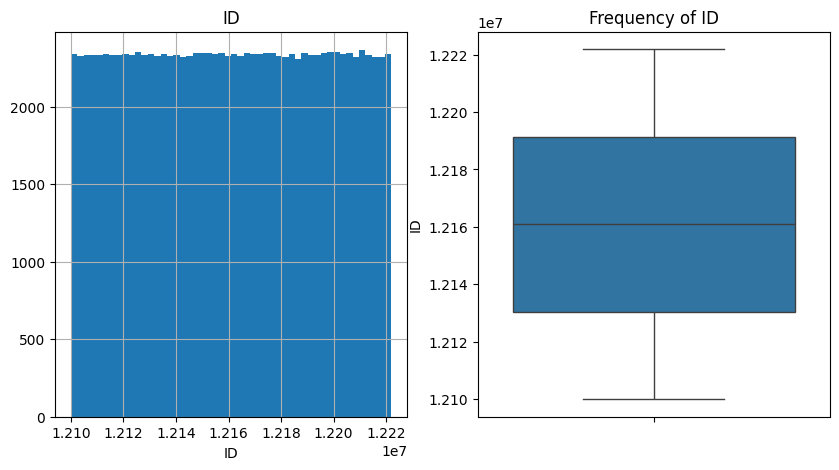

______________________________________________________

Car_Owned


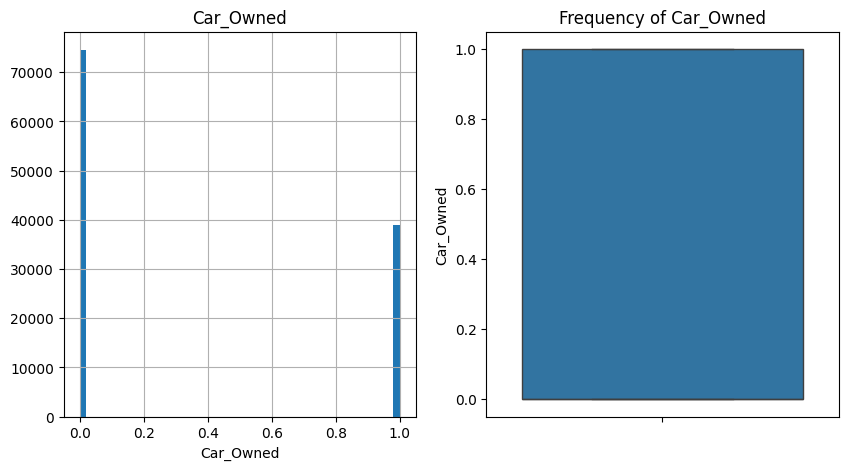

______________________________________________________

Bike_Owned


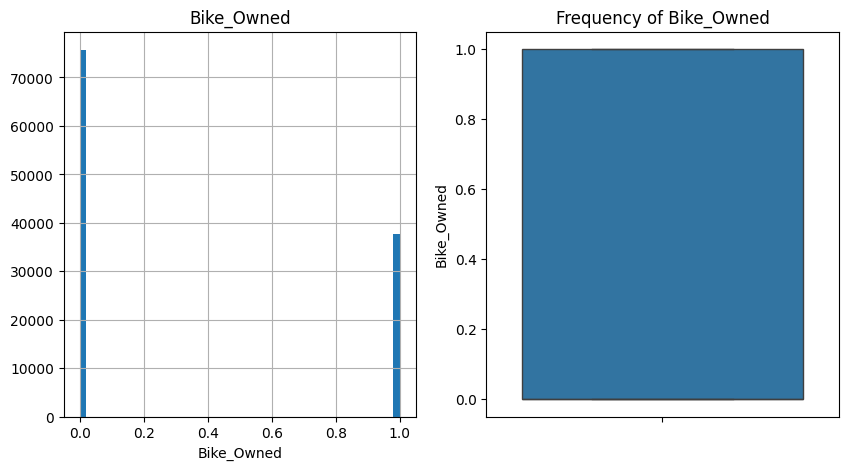

______________________________________________________

Active_Loan


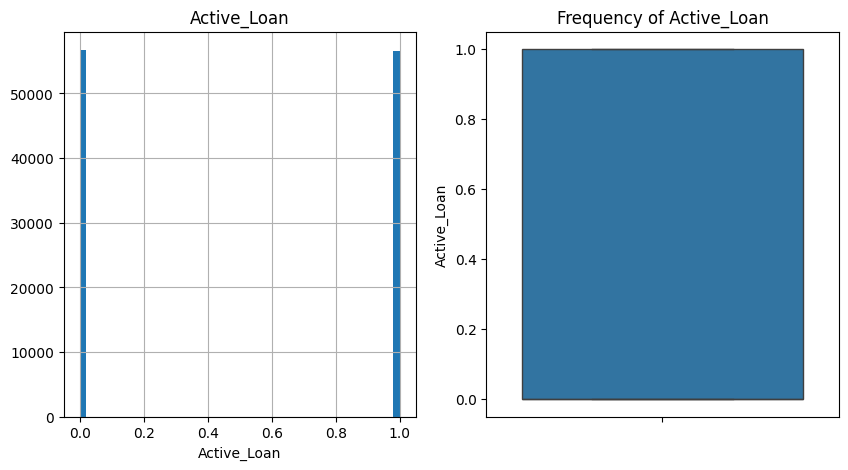

______________________________________________________

House_Own


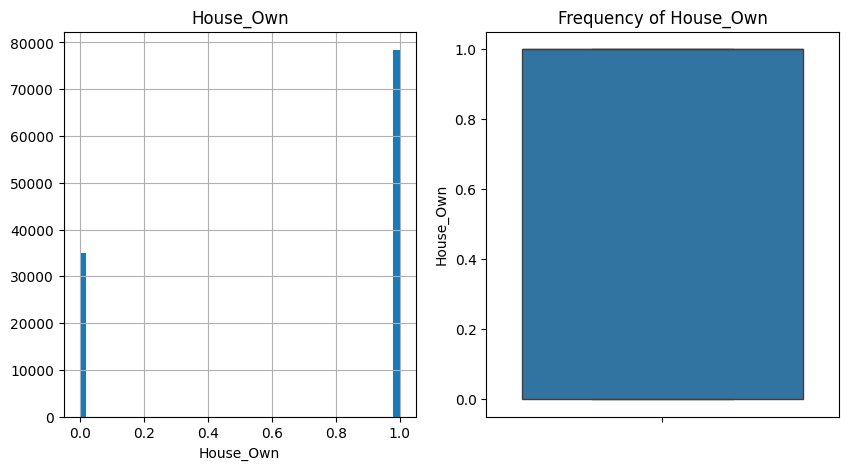

______________________________________________________

Child_Count


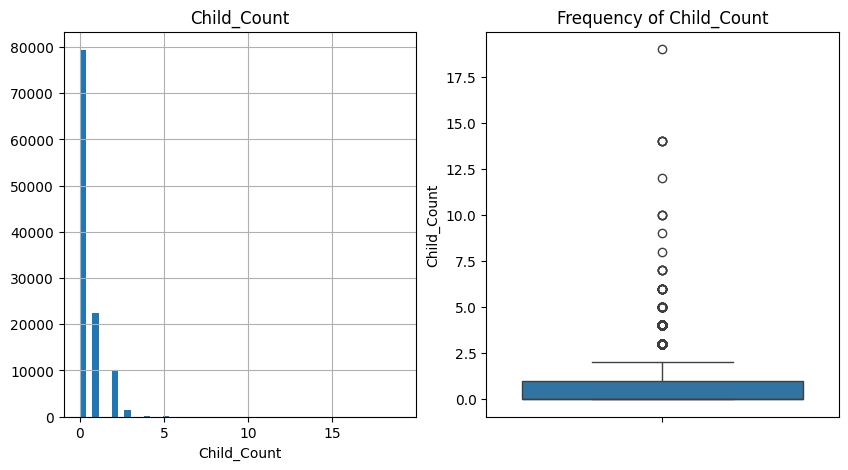

______________________________________________________

Own_House_Age


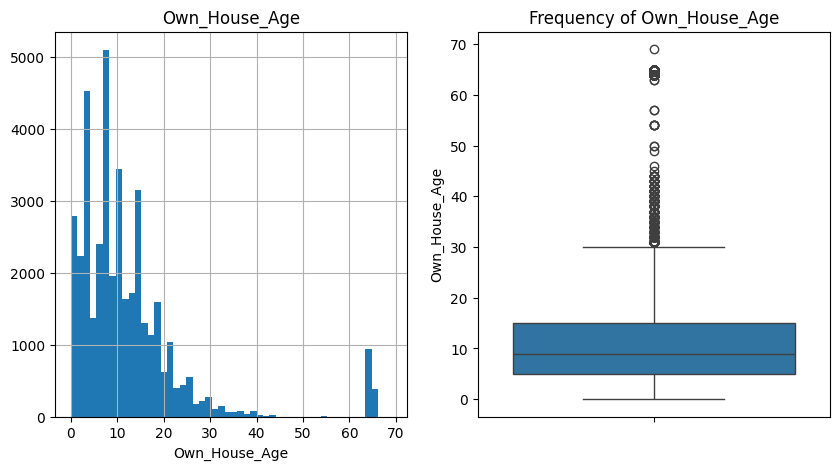

______________________________________________________

Mobile_Tag


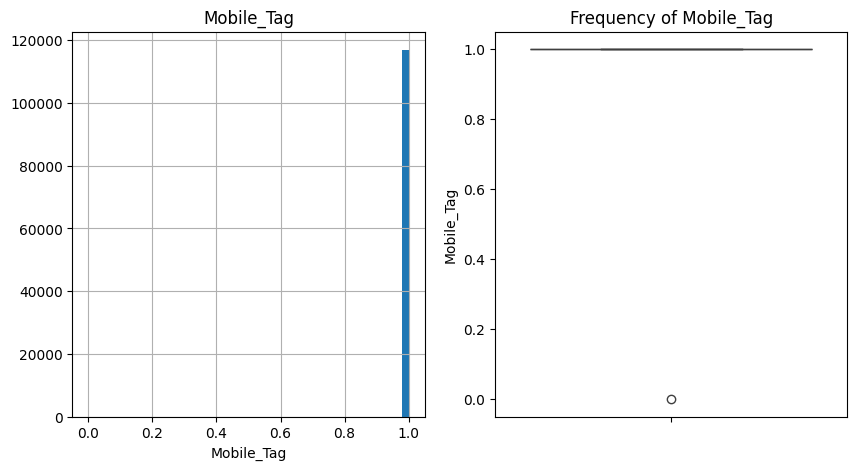

______________________________________________________

Homephone_Tag


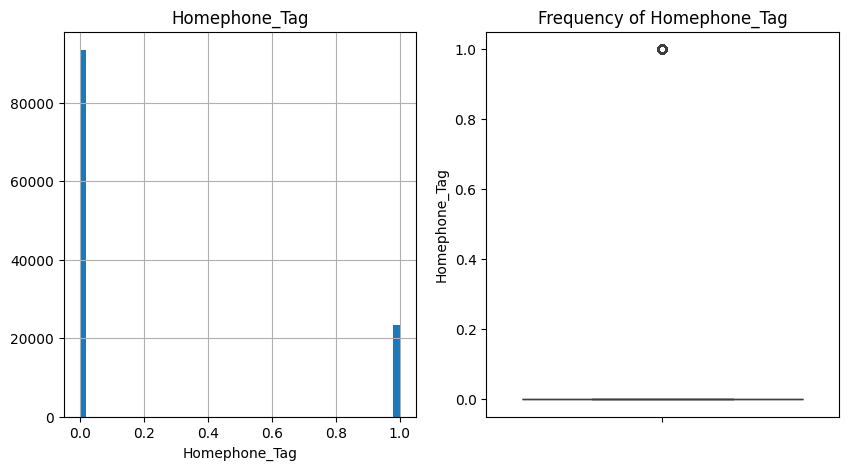

______________________________________________________

Workphone_Working


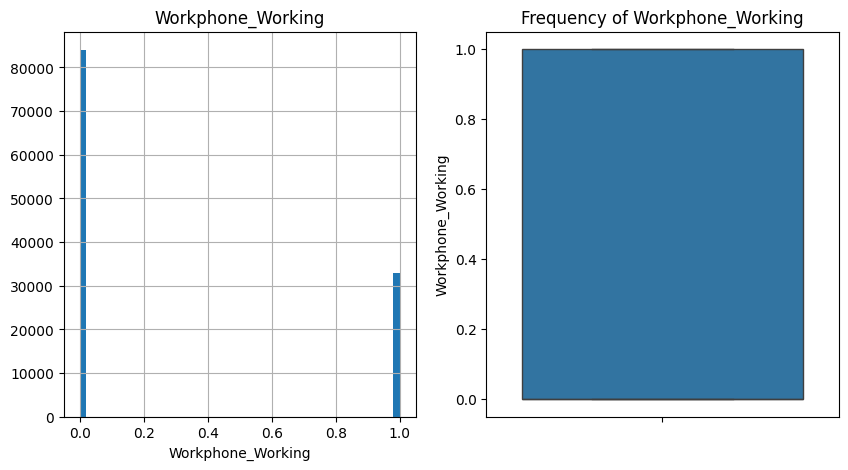

______________________________________________________

Client_Family_Members


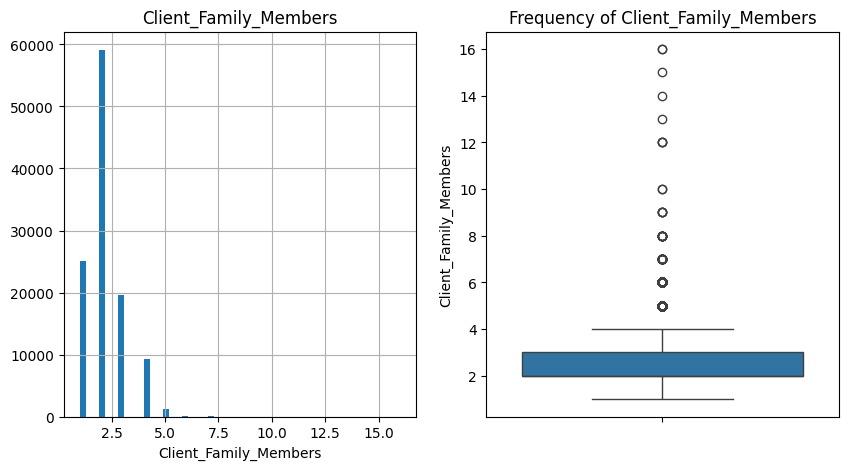

______________________________________________________

Cleint_City_Rating


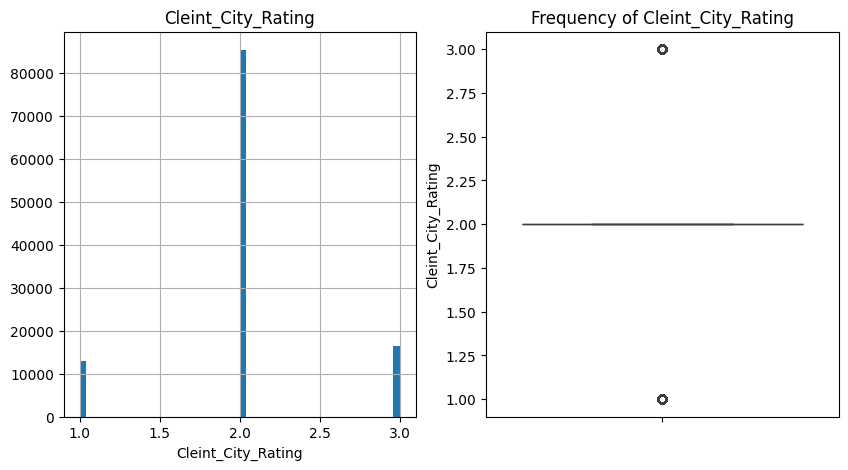

______________________________________________________

Application_Process_Day


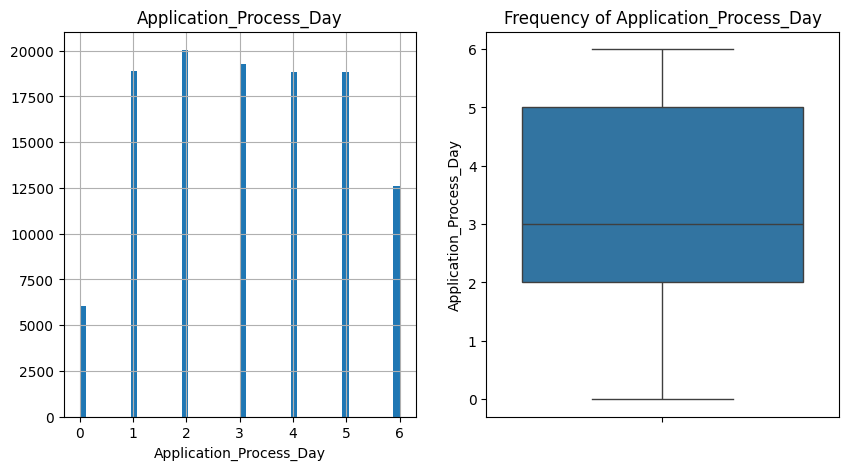

______________________________________________________

Application_Process_Hour


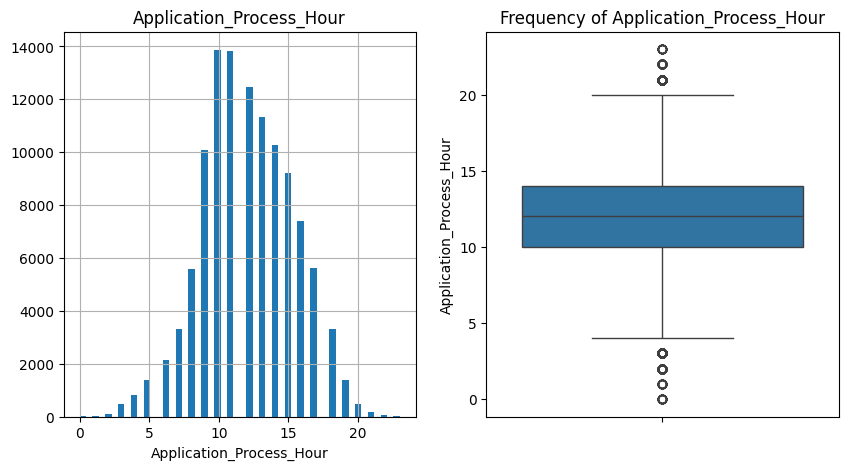

______________________________________________________

Score_Source_1


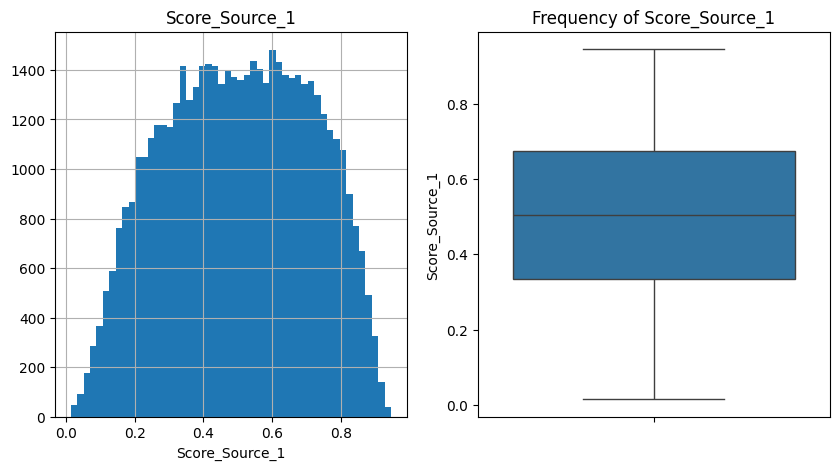

______________________________________________________

Score_Source_2


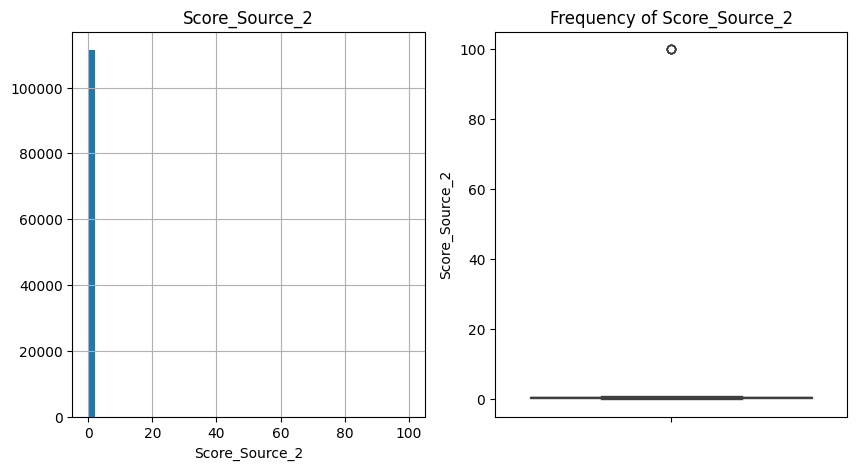

______________________________________________________

Social_Circle_Default


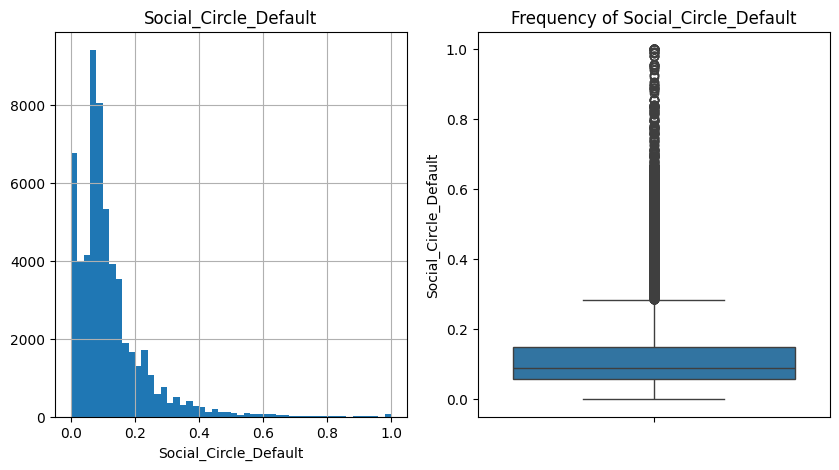

______________________________________________________

Phone_Change


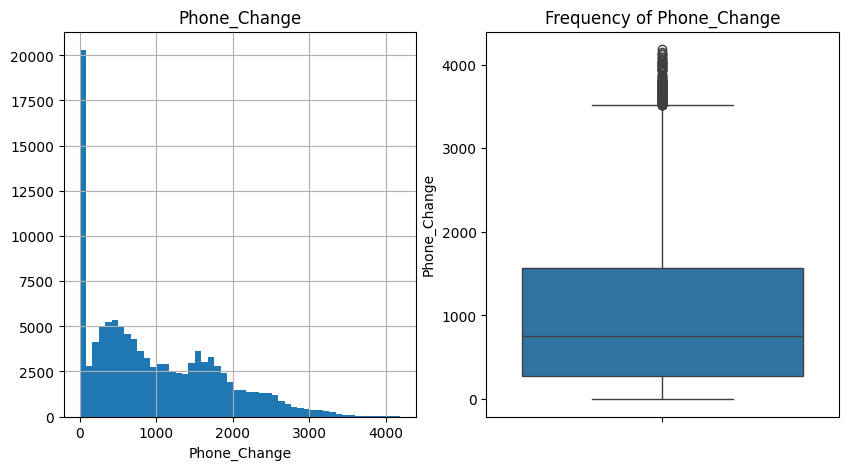

______________________________________________________

Credit_Bureau


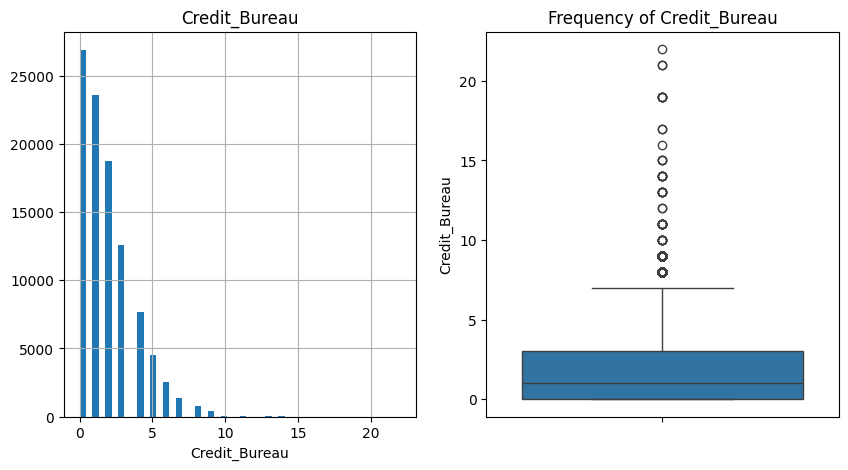

______________________________________________________

Default


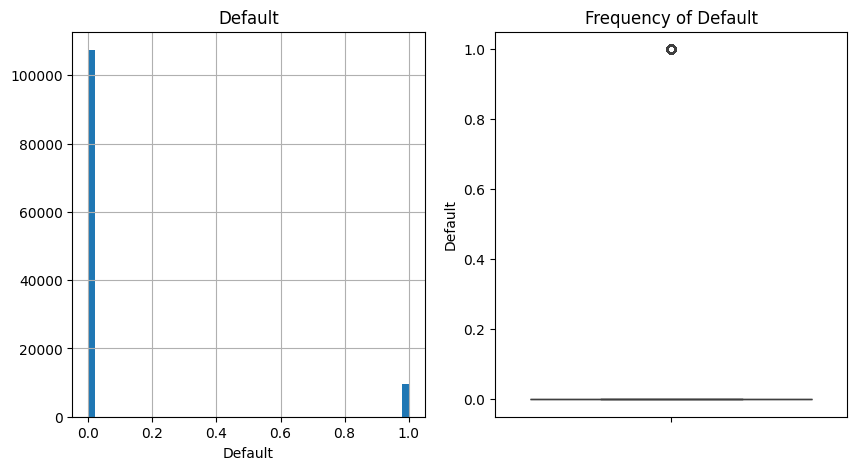

______________________________________________________



In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    #quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    #print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))
            plt.subplot(1, 2, 1)
            dataframe[numerical_col].hist(bins=50)
            plt.xlabel(numerical_col)
            plt.title(numerical_col)

            plt.subplot(1, 2, 2)
            sns.boxplot(y=numerical_col, data=dataframe)
            plt.title("Frequency of " + numerical_col)
            plt.xticks(rotation=90)

            plt.show(block=True)

            print("______________________________________________________\n")

for col in num_cols:
    print(col)
    num_summary(df, col, plot=True)


In [ ]:
len(num_cols), len(df.columns)

(20, 40)

# Removing the outliers from numerical columns

In [ ]:
na_cols = df.columns[df.isna().all()]
num_na_cols = len(na_cols)
print(f"Number of columns with only NA values: {num_na_cols}")

Number of columns with only NA values: 0


In [ ]:
df[num_cols].isna().sum()

,0
ID,0
Car_Owned,3429
Bike_Owned,3456
Active_Loan,3484
House_Own,3505
Child_Count,3494
Own_House_Age,76796
Mobile_Tag,0
Homephone_Tag,0
Workphone_Working,0


In [ ]:
to_drop = ["Score_Source_1", "Social_Circle_Default", "Own_House_Age"]
to_drop_2 = ["Client_Occupation", "Score_Source_3"]

In [ ]:


df = df.drop(to_drop_2, axis=1)


In [ ]:
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,17.0,Yes,Yes,Self-employed,0.568066,0.478787,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,15.0,Yes,Yes,XNA,NaN,0.135182,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.2021,674.0,1.0,0


In [ ]:
replace_with_mean = ["Child_Count", "Client_Family_Members", "Cleint_City_Rating",
                     "Application_Process_Day", "Application_Process_Hour", "Credit_Bureau"]

In [ ]:
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,17.0,Yes,Yes,Self-employed,0.568066,0.478787,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,15.0,Yes,Yes,XNA,NaN,0.135182,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.2021,674.0,1.0,0


In [ ]:
def remove_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  df_out = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
  return df_out

In [ ]:
def remove_missing_values(df, col):
  df = df.dropna(subset=[col])
  return df

In [ ]:
def replace_missing_with_mean(df, col):
  df[col] = df[col].fillna(df[col].mean())
  return df

## The process of cleaning the data-
 - First remove the outliers
 - Fill the NA values with mean wherever possible

 - Remove all missing value columns then.

In [ ]:
for col in replace_with_mean:
  # df = remove_outliers(df, col)
  df = replace_missing_with_mean(df, col)

In [ ]:

df.shape


(116855, 38)

In [ ]:
for col in df.columns:
  df = remove_missing_values(df, col)

In [ ]:
df.isna().sum()

,0
ID,0
Client_Income,0
Car_Owned,0
Bike_Owned,0
Active_Loan,0
House_Own,0
Child_Count,0
Credit_Amount,0
Loan_Annuity,0
Accompany_Client,0


In [ ]:
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,12.060214,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.2021,674.0,1.000000,0
6,12128086,15750,1.0,1.0,0.0,1.0,0.0,128835,3779.55,Alone,...,14.000000,Yes,Yes,XNA,0.729913,0.602545,0.2041,0.0,3.000000,0
15,12105180,45000,1.0,0.0,0.0,1.0,1.0,105493.5,4482.45,Alone,...,9.000000,Yes,Yes,Business Entity Type 3,0.351486,0.241231,0.0670,713.0,1.891824,0
102,12127046,27000,1.0,0.0,0.0,1.0,3.0,53366.85,4003.2,Alone,...,10.000000,Yes,Yes,Business Entity Type 3,0.477169,0.677447,0.0330,1805.0,4.000000,0
122,12150234,27000,1.0,0.0,0.0,0.0,0.0,64008,2997,Alone,...,7.000000,Yes,Yes,Business Entity Type 3,0.511357,0.569707,0.1660,1070.0,1.891824,1


In [ ]:
df.shape

(4531, 38)

In [ ]:
df["Default"].value_counts()

,count
Default,
0,4255
1,276


In [ ]:
df.isna().sum()

,0
ID,0
Client_Income,0
Car_Owned,0
Bike_Owned,0
Active_Loan,0
House_Own,0
Child_Count,0
Credit_Amount,0
Loan_Annuity,0
Accompany_Client,0


In [ ]:
df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau', 'Default'],
      dtype='object')

In [ ]:
def balance_dataset(df, target_col):
  class_0 = df[df[target_col] == 0]
  class_1 = df[df[target_col] == 1]

  sample_size = min(len(class_0), len(class_1))

  balanced_df = pd.concat([class_0.sample(sample_size), class_1.sample(sample_size)])

  return balanced_df.sample(frac=1)

df_train = balance_dataset(df, 'Default')

In [ ]:
df_train.shape

(552, 38)

In [ ]:
df_train["Default"].value_counts()

,count
Default,
1,276
0,276


Pipeline to the model

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Function to handle full pipeline with one-hot encoding
def random_forest_pipeline(df, target_column, categorical_columns):
    # Step 1: Data preparation
    X = df.drop(columns=[target_column])  # Features
    y = df[target_column]  # Target

    # Step 2: Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Step 3: Preprocessing - One Hot Encoding for categorical columns
    # Define column transformer to one-hot encode categorical columns and scale numerical ones
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_columns),
            ('num', StandardScaler(), [col for col in X.columns if col not in categorical_columns])
        ]
    )

    # Step 4: Define Random Forest pipeline
    rf_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Step 5: Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cross_val_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=cv, scoring='accuracy')

    print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
    print(f"Mean Cross-Validation Accuracy: {cross_val_scores.mean()}")

    # Step 6: Train the pipeline model
    rf_pipeline.fit(X_train, y_train)

    # Step 7: Predictions on the test set
    y_pred = rf_pipeline.predict(X_test)

    # Step 8: Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)

    # Step 9: ROC Curve and AUC
    y_pred_proba = rf_pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Plotting ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

    # Step 10: Function to predict on new data
    def predict_new_data(new_data):
        return rf_pipeline.predict(new_data)

    # Return the trained model and prediction function
    return rf_pipeline, predict_new_data

# Example usage of the function
# df = pd.read_csv('your_data.csv')  # Load your dataset
# categorical_columns = ['col1', 'col2']  # Specify your categorical columns
# rf_model, predict_new_data = random_forest_pipeline(df, 'target', categorical_columns)  # Replace 'target' with your actual target column

# Making predictions on new data
# new_data = pd.DataFrame(...)  # Load or create new data to predict on
# predictions = predict_new_data(new_data)
# print(predictions)



In [ ]:


import numpy as np
cat_cols = df_train.select_dtypes(exclude=np.number).columns.tolist()
print(cat_cols)


['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization']


# Random Forest Pipeline
 - Only for Random Forest classifier model

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Function to handle full pipeline with type consistency and one-hot encoding
def random_forest_pipeline_2(df, target_column, categorical_columns):
    # Step 1: Data preparation
    # Ensure that all categorical columns have consistent string data types
    for col in categorical_columns:
        df[col] = df[col].astype(str)

    X = df.drop(columns=[target_column])  # Features
    y = df[target_column]  # Target

    # Step 2: Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Step 3: Preprocessing - One Hot Encoding for categorical columns
    # Define column transformer to one-hot encode categorical columns and scale numerical ones
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),  # One-hot encoding for categorical columns
            ('num', StandardScaler(), [col for col in X.columns if col not in categorical_columns])  # Scaling numerical columns
        ]
    )

    # Step 4: Define Random Forest pipeline
    rf_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Step 5: Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cross_val_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=cv, scoring='accuracy')

    print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
    print(f"Mean Cross-Validation Accuracy: {cross_val_scores.mean()}")

    # Step 6: Train the pipeline model
    rf_pipeline.fit(X_train, y_train)

    # Step 7: Predictions on the test set
    y_pred = rf_pipeline.predict(X_test)

    # Step 8: Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)

    # Step 9: ROC Curve and AUC
    y_pred_proba = rf_pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Plotting ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

    # Step 10: Function to predict on new data
    def predict_new_data(new_data):
        # Convert categorical columns to strings before prediction
        for col in categorical_columns:
            new_data[col] = new_data[col].astype(str)
        return rf_pipeline.predict(new_data)

    # Return the trained model and prediction function
    return rf_pipeline, predict_new_data, y_pred

# Example usage of the function
# df = pd.read_csv('your_data.csv')  # Load your dataset
# categorical_columns = ['col1', 'col2']  # Specify your categorical columns
# rf_model, predict_new_data = random_forest_pipeline(df, 'target', categorical_columns)  # Replace 'target' with your actual target column

# Making predictions on new data
# new_data = pd.DataFrame(...)  # Load or create new data to predict on
# predictions = predict_new_data(new_data)
# print(predictions)


# Classsification Pipeline
- Trying 3 different models to choose best model

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Function to handle full pipeline with type consistency, one-hot encoding, and multiple model options
def classification_pipeline(df, target_column, categorical_columns, model):
    # Step 1: Data preparation
    # Ensure that all categorical columns have consistent string data types
    for col in categorical_columns:
        df[col] = df[col].astype(str)

    X = df.drop(columns=[target_column])  # Features
    y = df[target_column]  # Target

    # Step 2: Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Step 3: Preprocessing - One Hot Encoding for categorical columns
    # Define column transformer to one-hot encode categorical columns and scale numerical ones
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),  # One-hot encoding for categorical columns
            ('num', StandardScaler(), [col for col in X.columns if col not in categorical_columns])  # Scaling numerical columns
        ]
    )

    # Step 4: Define the classification pipeline with the selected model
    clf_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Step 5: Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cross_val_scores = cross_val_score(clf_pipeline, X_train, y_train, cv=cv, scoring='accuracy')

    print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
    print(f"Mean Cross-Validation Accuracy: {cross_val_scores.mean()}")

    # Step 6: Train the pipeline model
    clf_pipeline.fit(X_train, y_train)

    # Step 7: Predictions on the test set
    y_pred = clf_pipeline.predict(X_test)

    # Step 8: Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)

    # Step 9: ROC Curve and AUC
    y_pred_proba = clf_pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Plotting ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

    # Step 10: Function to predict on new data
    def predict_new_data(new_data):
        # Convert categorical columns to strings before prediction
        for col in categorical_columns:
            new_data[col] = new_data[col].astype(str)
        return clf_pipeline.predict(new_data)

    # Return the trained model and prediction function
    return clf_pipeline, predict_new_data, y_pred, y_test



Cross-Validation Accuracy Scores: [0.58426966 0.68181818 0.52272727 0.68181818 0.63636364]
Mean Cross-Validation Accuracy: 0.6213993871297242
Test Accuracy: 0.6486486486486487

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.65        56
           1       0.64      0.65      0.65        55

    accuracy                           0.65       111
   macro avg       0.65      0.65      0.65       111
weighted avg       0.65      0.65      0.65       111


Confusion Matrix:
[[36 20]
 [19 36]]


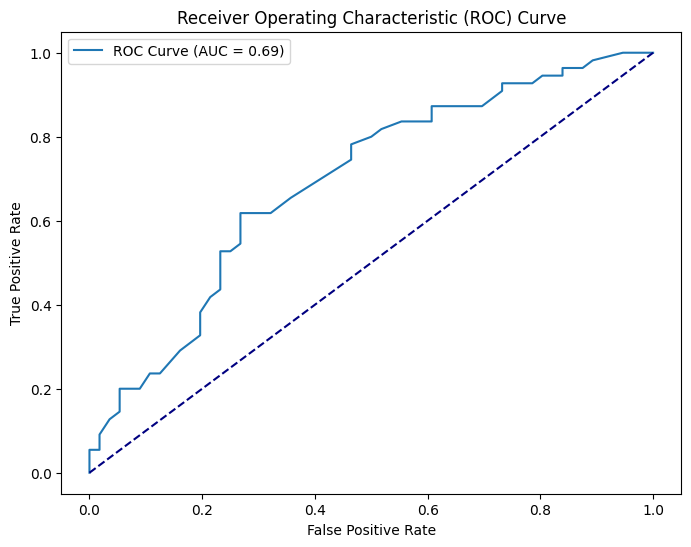

In [ ]:
# Using RandomForest
rf_model, predict_new_data_rf, rf_predictions, y_test = classification_pipeline(df_train, 'Default', cat_cols, RandomForestClassifier(random_state=42))


Cross-Validation Accuracy Scores: [0.69662921 0.67045455 0.60227273 0.72727273 0.68181818]
Mean Cross-Validation Accuracy: 0.6756894790602656
Test Accuracy: 0.6216216216216216

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.54      0.59        56
           1       0.60      0.71      0.65        55

    accuracy                           0.62       111
   macro avg       0.63      0.62      0.62       111
weighted avg       0.63      0.62      0.62       111


Confusion Matrix:
[[30 26]
 [16 39]]


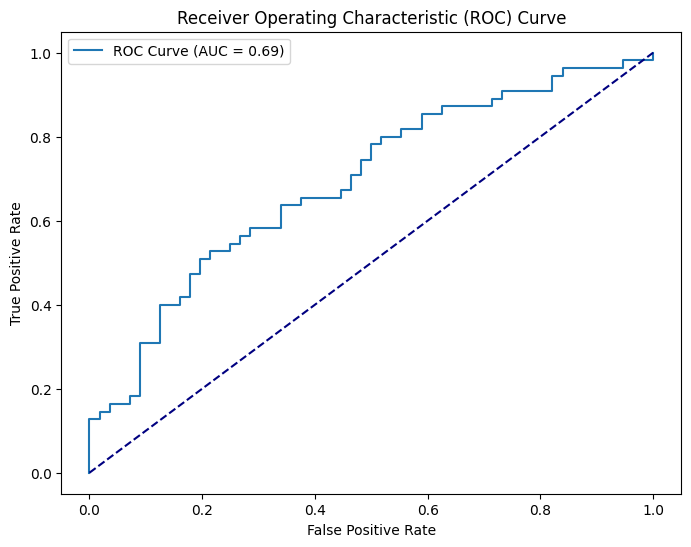

In [ ]:
# Using Logistic Regression
lr_model, predict_new_data_lr, lr_predictions, y_test = classification_pipeline(df_train, 'Default', cat_cols, LogisticRegression(max_iter=1000))

Cross-Validation Accuracy Scores: [0.66292135 0.60227273 0.48863636 0.67045455 0.65909091]
Mean Cross-Validation Accuracy: 0.6166751787538305
Test Accuracy: 0.6486486486486487

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.57      0.62        56
           1       0.62      0.73      0.67        55

    accuracy                           0.65       111
   macro avg       0.65      0.65      0.65       111
weighted avg       0.65      0.65      0.65       111


Confusion Matrix:
[[32 24]
 [15 40]]


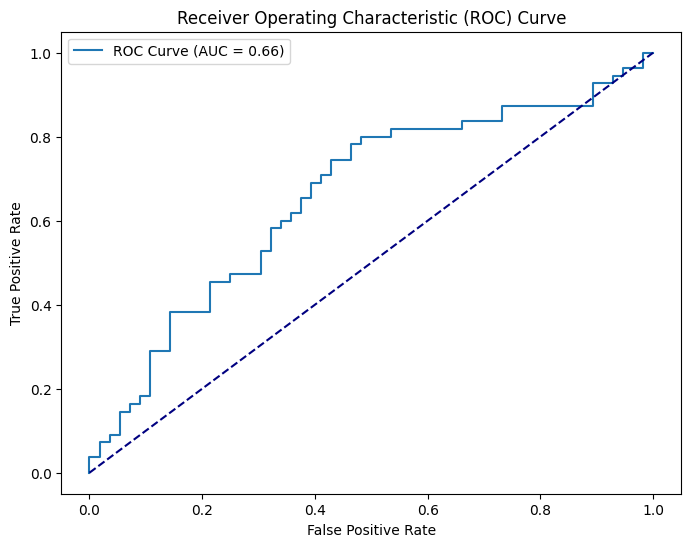

In [ ]:
# Using Gradient Boosting
gb_model, predict_new_data_gb, gb_predictions, y_test = classification_pipeline(df_train, 'Default', cat_cols, GradientBoostingClassifier(random_state=42))

In [ ]:

def evaluate_model(model, y_test, y_pred):

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [ ]:
def compare_models(y_test, gb_predictions, lr_predictions, rf_predictions):
  models = [gb_model, lr_model, rf_model]
  predictions = [gb_predictions, lr_predictions, rf_predictions]
  accuracies = []

  for model, pred in zip(models, predictions):
    accuracies.append(evaluate_model(model, y_test, pred))
    return accuracies

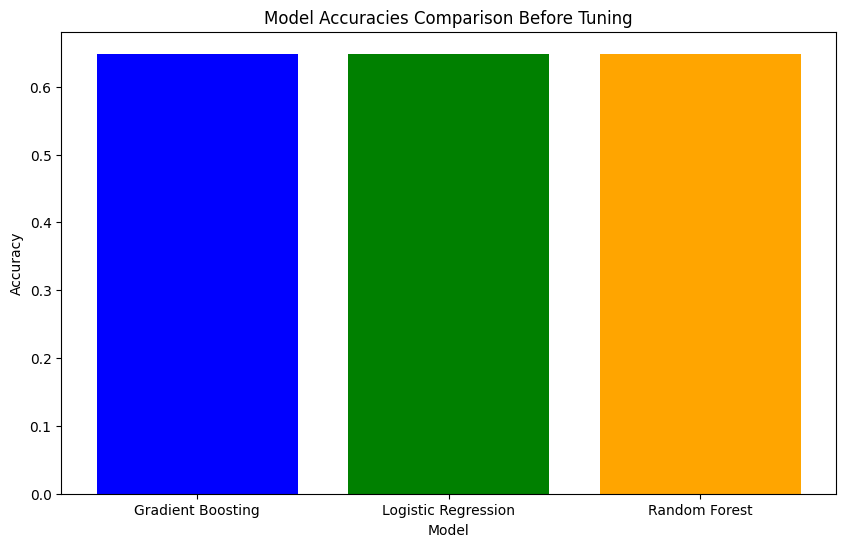

In [ ]:
# Plotting the accuracies
accuracies = compare_models(y_test, gb_predictions, lr_predictions, rf_predictions)
models = ['Gradient Boosting', 'Logistic Regression', 'Random Forest']
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison Before Tuning')
plt.show()

In [ ]:
X = df_train.drop(columns=['Default'])
y = df_train['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Tuning rf forest classifier

from sklearn.model_selection import GridSearchCV

def tune_random_forest(X_train, y_train):
    # Define the parameter grid for grid search
    param_grid = {
        'classifier__n_estimators': [200, 300, 500],
        'classifier__max_depth': [None, 20, 30],
        'classifier__min_samples_split': [5, 10],
        'classifier__min_samples_leaf': [2, 4],
        'classifier__bootstrap': [True, False]
    }


    rf = rf_model
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose=2)
    grid_search.fit(X_train, y_train)

    print("Best parameters for Random Forest:", grid_search.best_params_)
    print("Best cross-validation accuracy:", grid_search.best_score_)

    return grid_search.best_estimator_


In [ ]:
# For logistics Regression



def tune_logistic_regression(X_train, y_train):
    param_grid = {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear'],
        'classifier__penalty': ['l2'],
        'classifier__max_iter': [200, 500]
    }
    lr = lr_model
    grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose=2)
    grid_search.fit(X_train, y_train)

    print("Best parameters for Logistic Regression:", grid_search.best_params_)
    print("Best cross-validation accuracy:", grid_search.best_score_)

    return grid_search.best_estimator_


In [ ]:
# For GradientBoostingClassifier

def tune_gradient_boosting(X_train, y_train):
    param_grid = {
        'classifier__n_estimators': [200, 300, 500],
        'classifier__learning_rate': [0.1, 0.05],
        'classifier__max_depth': [5, 8],
        'classifier__min_samples_split': [5, 10],
        'classifier__min_samples_leaf': [2, 4],
        'classifier__subsample': [1.0]
    }
    gb = gb_model
    grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose=2)
    grid_search.fit(X_train, y_train)

    print("Best parameters for Gradient Boosting:", grid_search.best_params_)
    print("Best cross-validation accuracy:", grid_search.best_score_)

    return grid_search.best_estimator_


## From Rf classifier
Best parameters for Random Forest: {'classifier__bootstrap': True, 'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best cross-validation accuracy: 0.6575842696629214

## From lr classifier
Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__max_iter': 200, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best cross-validation accuracy: 0.6394535240040857


## From Gradint Booster
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300, 'classifier__subsample': 1.0}
Best cross-validation accuracy: 0.628140960163432



## Uncomment these lines when you need to tune the model as its time taking

In [ ]:
# tune_random_forest(X_train, y_train)

In [ ]:
# tune_logistic_regression(X_train, y_train)

In [ ]:
# tune_gradient_boosting(X_train, y_train)

# Comparison of accuracies after tuning the models
- It's decreased actually

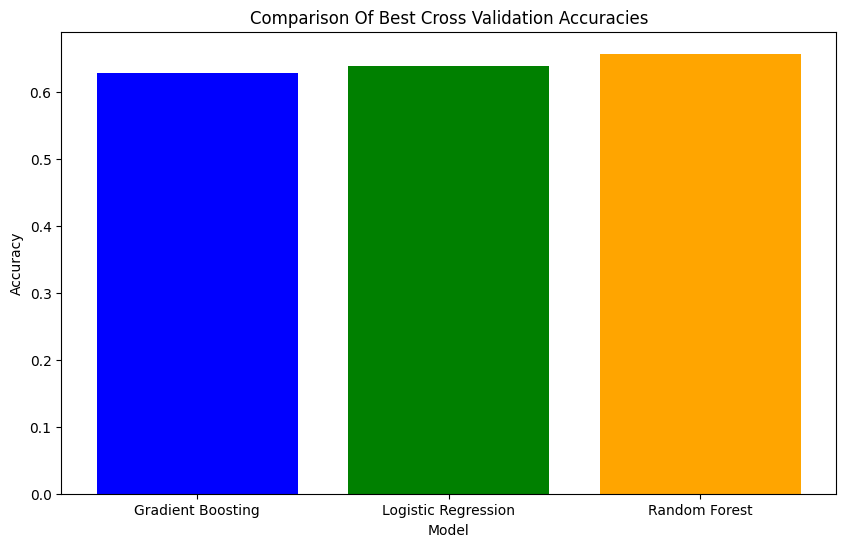

In [ ]:
best_cv_accuracy = [0.628140960163432, 0.6394535240040857, 0.6575842696629214]

plt.figure(figsize=(10, 6))
plt.bar(models, best_cv_accuracy, color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison Of Best Cross Validation Accuracies')
plt.show()


# Put Best params model in classification pipeline to get report over it


Cross-Validation Accuracy Scores: [0.65168539 0.625      0.55681818 0.67045455 0.68181818]
Mean Cross-Validation Accuracy: 0.6371552604698671
Test Accuracy: 0.6486486486486487

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.57      0.62        56
           1       0.62      0.73      0.67        55

    accuracy                           0.65       111
   macro avg       0.65      0.65      0.65       111
weighted avg       0.65      0.65      0.65       111


Confusion Matrix:
[[32 24]
 [15 40]]


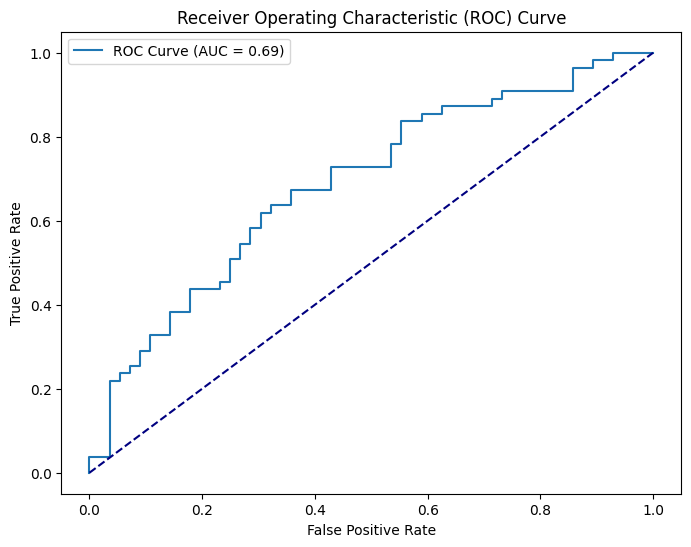

In [ ]:

rf_tuned_model, predict_new_data_rf_tuned, rf_predictions_tuned, y_test = classification_pipeline(df_train, 'Default', cat_cols, RandomForestClassifier(random_state=42,
                                                                                                                                                        n_estimators=100,
                                                                                                                                                        max_depth= 30,
                                                                                                                                                        min_samples_leaf= 1,
                                                                                                                                                        min_samples_split=5))

Cross-Validation Accuracy Scores: [0.64044944 0.68181818 0.625      0.57954545 0.64772727]
Mean Cross-Validation Accuracy: 0.6349080694586313
Test Accuracy: 0.6306306306306306

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.54      0.59        56
           1       0.61      0.73      0.66        55

    accuracy                           0.63       111
   macro avg       0.64      0.63      0.63       111
weighted avg       0.64      0.63      0.63       111


Confusion Matrix:
[[30 26]
 [15 40]]


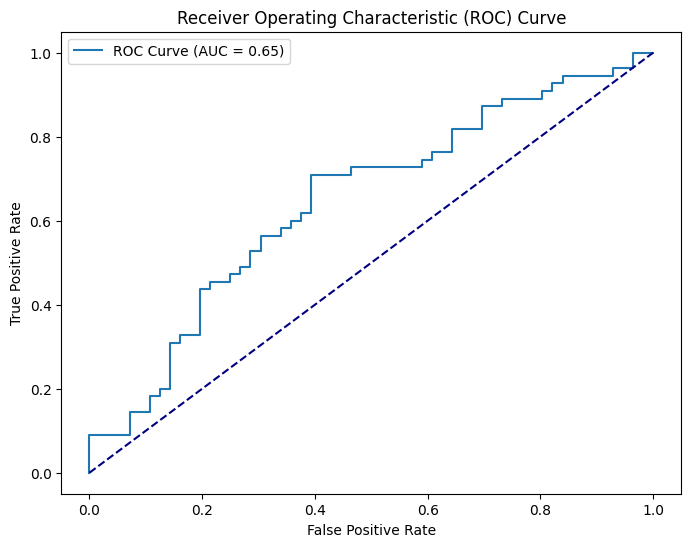

In [ ]:
gb_tuned_model, predict_new_data_gb_tuned, gb_predictions_tuned, y_test = classification_pipeline(df_train,
                                                                                                  'Default',
                                                                                                  cat_cols,
                                                                                                  GradientBoostingClassifier(random_state=42,
                                                                                                                                     n_estimators=300,
                                                                                                                                     learning_rate=0.1,
                                                                                                                                     max_depth=5,
                                                                                                                                     min_samples_leaf=2))


Cross-Validation Accuracy Scores: [0.68539326 0.625      0.60227273 0.78409091 0.67045455]
Mean Cross-Validation Accuracy: 0.6734422880490296
Test Accuracy: 0.6936936936936937

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.61      0.67        56
           1       0.66      0.78      0.72        55

    accuracy                           0.69       111
   macro avg       0.70      0.69      0.69       111
weighted avg       0.70      0.69      0.69       111


Confusion Matrix:
[[34 22]
 [12 43]]


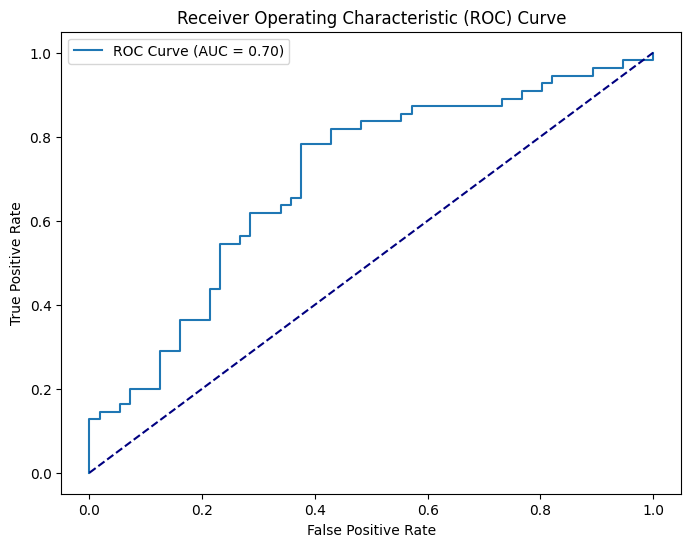

In [ ]:
lr_tuned_model, predict_new_data_lr_tuned, lr_predictions_tuned, y_test = classification_pipeline(df_train,
                                                                                                  'Default',
                                                                                                  cat_cols,
                                                                                                  LogisticRegression(max_iter=1000,
                                                                                                                     C=0.1,
                                                                                                                     penalty='l2',
                                                                                                                     solver='liblinear'))

In [ ]:
test_accuracies = []
tuned_models = [gb_tuned_model, lr_tuned_model, rf_tuned_model]
tuned_predictions = [gb_predictions_tuned, lr_predictions_tuned, rf_predictions_tuned]

for model, pred in zip(tuned_models, tuned_predictions):
  test_accuracies.append(evaluate_model(model, y_test, pred))



Text(0.5, 1.0, 'Model Test Accuracies Comparison After Tuning')

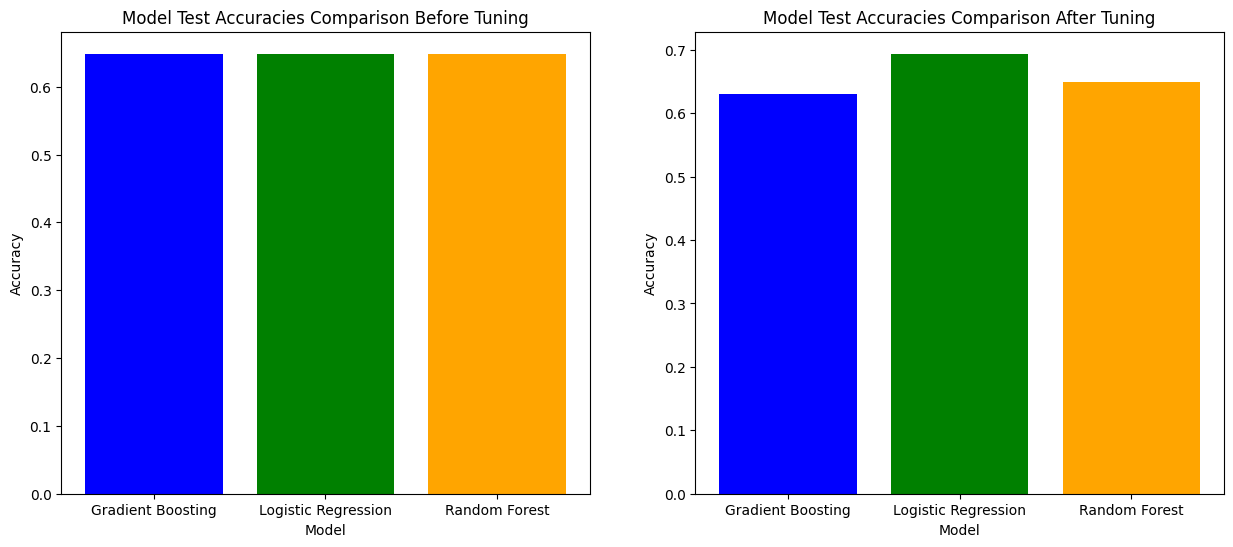

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Test Accuracies Comparison Before Tuning')

plt.subplot(1,2,2)
plt.bar(models, test_accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Test Accuracies Comparison After Tuning')



# Saving The Model

In [ ]:
# import pickle

# def save_model(model, filename):
#   with open(filename, 'wb') as file:
#     pickle.dump(model, file)

In [ ]:
# save_model(model, 'model.pkl')

In [ ]:
# import pandas as pd

# def save_predictions_to_csv(predictions, filename):
#   df = pd.DataFrame({'Predictions': predictions}, index=range(len(predictions)))
#   df.to_csv(filename, index=False)

In [ ]:
# save_predictions_to_csv(predictions, 'predictions.csv')

In [ ]:
# save_predictions_to_csv_2(test_ds, 'test.csv')

In [ ]:
# test_ds = df_train.drop(columns=['Default'])

In [ ]:
# test_ds.to_csv('test_update.csv', index=False)